# Data Cleaning:

Importing Libraries and looking through data:

In [1]:
# Libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
Y = pd.read_csv('./data/training_labels.csv')
X = pd.read_csv('./data/training_values.csv')

In [3]:
Y.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [4]:
Y.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [5]:
X.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [6]:
X.shape

(59400, 40)

In [7]:
X.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [8]:
# Combine X and Y dataframes into one
df = pd.concat([Y.reset_index(drop=True), X.reset_index(drop=True)], axis=1)

In [9]:
df.head()

,id,status_group,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [10]:
df.dtypes

id                         int64
status_group              object
id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management

In [11]:
df.isna().sum()

id                           0
status_group                 0
id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_

Note: funder(3635), installer(3635), subvillage(371), public_meeting(3334), scheme_management(3877), scheme_name(28166), permit(3056) are the columns with missing values. 

In [12]:
# Drop id column:
df.drop(columns=['id'], axis=1, inplace=True)

In [13]:
drop_cols = []

In [14]:
df

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,functional,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,functional,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,functional,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,functional,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


## Missing Values:

First, I will check heatmap to look at what columns I will need to work with for missing values.

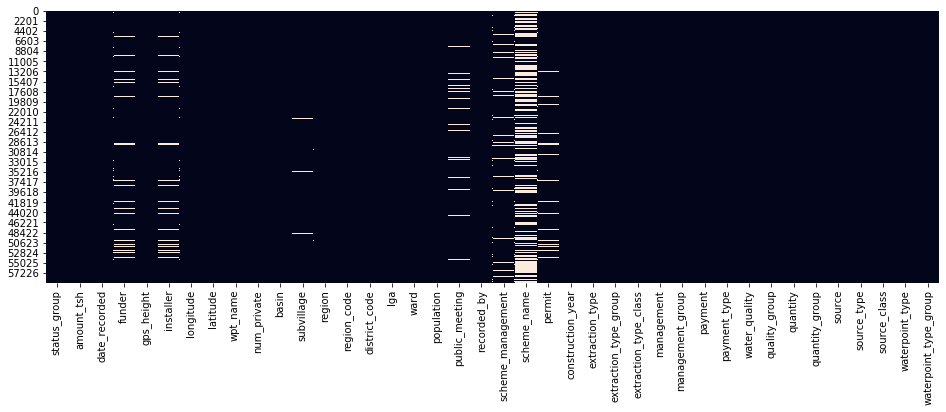

In [16]:
plt.figure(figsize=(16, 5))
sns.heatmap(df.isnull(), cbar=False);

### funder: name of funders

In [17]:
df.funder.value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Daida                        1
Iom                          1
Mayiro                       1
Municipal Council            1
Rotery C                     1
Name: funder, Length: 1897, dtype: int64

In [18]:
df.funder.isna().sum()

3635

In [19]:
df['funder'] = np.where(df['funder'].isna(), 'Missing', df['funder'])

In [20]:
df['funder'].isna().sum()

0

### installer: name of installers

In [21]:
df.installer.value_counts()

DWE              17402
Government        1825
RWE               1206
Commu             1060
DANIDA            1050
                 ...  
SAIDI CO             1
GDP                  1
mwita kichere        1
Kapelo               1
lusajo               1
Name: installer, Length: 2145, dtype: int64

In [22]:
df['installer'].isna().sum()

3655

In [23]:
df['installer'] = np.where(df['installer'].isna(), 'Missing', df['installer'])

In [24]:
df['installer'].isna().sum()

0

### subvillage:  name of subvillage

In [25]:
df.subvillage.value_counts()

Madukani        508
Shuleni         506
Majengo         502
Kati            373
Mtakuja         262
               ... 
Kifilya A         1
Imbopong          1
Shama             1
Ruyenzi B         1
Ngomba Chini      1
Name: subvillage, Length: 19287, dtype: int64

In [26]:
df.subvillage.isna().sum()

371

In [27]:
df.loc[df['subvillage'].isna(), :]

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
342,non functional,0.0,2011-03-16,Government Of Tanzania,0,North,36.557631,-6.233394,Kwa Mihinzo,0,Wami / Ruvu,NaN,Dodoma,1,3,Kongwa,Sagara,0,True,GeoData Consultants Ltd,VWC,Saga,False,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe multiple,communal standpipe
360,non functional,0.0,2011-03-25,Commu,0,Commu,36.416701,-6.220157,Kwa Emanuel,0,Wami / Ruvu,NaN,Dodoma,1,3,Kongwa,Kongwa Urban,0,True,GeoData Consultants Ltd,VWC,Mlan,False,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe
379,functional,0.0,2011-03-20,World Bank,0,Rhobi,36.729383,-6.084255,Kwa Dimanyi,0,Wami / Ruvu,NaN,Dodoma,1,3,Kongwa,Pandambili,0,True,GeoData Consultants Ltd,VWC,Pand,False,0,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
565,non functional,0.0,2011-03-18,World Bank,0,Rhoda,36.696881,-5.993192,Mpande,0,Wami / Ruvu,NaN,Dodoma,1,3,Kongwa,Njoge,0,True,GeoData Consultants Ltd,VWC,Hemb,False,0,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
966,functional,0.0,2011-03-11,Water,0,Commu,36.322623,-6.030500,Kwa Charles,0,Wami / Ruvu,NaN,Dodoma,1,3,Kongwa,Sejeli,0,True,GeoData Consultants Ltd,VWC,Seje,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
989,functional,0.0,2011-03-18,Water,0,Commu,36.689948,-5.950168,Zahanati,0,Wami / Ruvu,NaN,Dodoma,1,3,Kongwa,Njoge,0,True,GeoData Consultants Ltd,VWC,Njog,False,0,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
1236,non functional,0.0,2011-03-12,Government Of Tanzania,0,Gover,36.449712,-5.948728,none,0,Wami / Ruvu,NaN,Dodoma,1,3,Kongwa,Hogoro,0,True,GeoData Consultants Ltd,VWC,Hogo,True,0,mono,mono,motorpump,vwc,user-group,never pay,never pay,salty,salty,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
1319,functional,0.0,2011-03-21,Water,0,Commu,36.581040,-6.051973,Shuleni,0,Wami / Ruvu,NaN,Dodoma,1,3,Kongwa,Mtanana,0,True,GeoData Consultants Ltd,VWC,Mtan,False,0,mono,mono,motorpump,private operator,commercial,pay per bucket,per bucket,salty,salty,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
1354,non functional,0.0,2011-03-24,Water,0,Commu,36.647900,-6.263172,Kwa John Mwame,0,Wami / Ruvu,NaN,Dodoma,1,3,Kongwa,Iduo,0,True,GeoData Consultants Ltd,VWC,Iduo,False,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,salty,salty,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
1398,functional,0.0,2011-03-10,World Bank,0,Nice,36.342036,-6.155091,Kwa Charles,0,Wami / Ruvu,NaN,Dodoma,1,3,Kongwa,Sejeli,0,True,GeoData Consultants Ltd,VWC,Manu,True,0,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe


In [28]:
df['subvillage'] = np.where(df['subvillage'].isna(), 'Missing', df['subvillage'])

In [29]:
df['subvillage'].isna().sum()

0

### public_meeting:  true or false

In [30]:
df.public_meeting.value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [31]:
df.public_meeting.isna().sum()

3334

Because public_meeting has class imbalance, I will put the missing values as True as majority class.

In [32]:
# SIMPLE IMPUTER USE!!

In [33]:
df['public_meeting'] = np.where(df['public_meeting'].isna() | df['public_meeting'], True, False)

In [34]:
df['public_meeting'].value_counts()

True     54345
False     5055
Name: public_meeting, dtype: int64

### scheme_management: name of management

In [35]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [36]:
df.scheme_management.isna().sum()

3877

In [37]:
df[df['scheme_management'] == 'None']

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
23603,functional,50.0,2013-03-18,0,-11,0,39.431194,-7.100783,Kwa Nyamtawa,0,Wami / Ruvu,Songani,Dar es Salaam,7,3,Temeke,Pemba Mnazi,40,True,GeoData Consultants Ltd,None,NaN,False,2000,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe


Initially, I wanted to put the missing values for scheme_management as 'Missing' like the rest but I saw that there was a None value and it only has 1 observation. I will put the missing values as None.

In [38]:
df['scheme_management'] = np.where(df['scheme_management'].isna(), 'None', df['scheme_management'])

In [39]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
None                 3878
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
Name: scheme_management, dtype: int64

### scheme_name:

In [40]:
df['scheme_name'].value_counts()

K                          682
None                       644
Borehole                   546
Chalinze wate              405
M                          400
                          ... 
Kaembe Project               1
Bonde la mto Mara            1
Ivuga Water Supply           1
Lerang'wa water supplly      1
Lerang'wa water Supply       1
Name: scheme_name, Length: 2696, dtype: int64

In [41]:
df['scheme_name'].isna().sum()

28166

28166 observations with missing value for scheme_name. Because this is categorical I will put it as "Missing".

In [42]:
df['scheme_name'] = np.where(df['scheme_name'].isna(), 'Missing', df['scheme_name'])

In [43]:
df['scheme_name'].isna().sum()

0

In [44]:
len(df['scheme_name'].unique())

2697

In [45]:
for col in df['scheme_name'].unique():
    print(col)
len(df['scheme_name'].unique())

Roman
Missing
Nyumba ya mungu pipe scheme
Zingibali
BL Bondeni
None
wanging'ombe water supply s
Makanj
Kidabu
Mashangwi
Quick wins Program
Komaka mandaka
Sobodo Borehole Scheme
Kitukuni water supply
BL Mwakikoti
Chalinze wate
Mae pipeline
UNDP
Ngana water supplied scheme
Itun
Bomala
Kirua kahe pumping water trust
Misiwa
Mtwango water supplied sche
K
Machumba estate pipe line
SHIMASA
wangama water supply scheme
Shirimatunda Water Supply
Laela group water Supp
Makwale water supplied sche
Nyang'hwale
Njoro Water Supply
Kirua kahe gravity water supply trust
Olgilai pipe line
Mabula mountains spr
Mkongoro One
Maambreni gravity water supply
Mwando water supply
M
Kaisho/Isingiro w
wanging'ombe supply scheme
Tove Mtwango gravity Scheme
Tengeru gravity water supply
Kulasi water supply
Malemb
Tawa
Loruvani gravity water supply
HESAWA
B
Gawa
Chankele/Bubango water project
Bagamoyo wate
Kijiji
Donge
Mradi wa maji wa mpitimbi
Mwang'hosha Nyamalogo
Shallow well
Mbati Water Supply
Losaa-Kia water sup

Ilambila water supply
Ussoke mlimani water supply
Kilumb
Mvaji ri
Kima
Sopa water supply
Mkulu water supply
Churu water supply
Mradi wa maji Vijijni
Kwakoa water supply
IWEKULE WATER SUPPLY
Tamb
Chiola
Kenswa
Suwasa water supply
Mlinga streem
Muun
Kagunguli Water Supply
Ballaa pipe line
BL Kandashi
Chibula
Namikango
BL Lekirumuni
Kumubila and mukalinzi  spring source
Kihoro
Gallapo water supply
Intinka Water Suppy
Ngulu water Supply
Ihongo
Nsololo water supply
Segese pipe scheme
Manyoni water supply
Ndapo
Ikondo electrical water sch
Magoto piped Water suplly
Machame Aleni water supply
Mambreni gravity water supply
Ilas
Dong
KASHWASA
Nyakagera water s
Kindoroko  water supply
Ushiri water supply
Sumayan gravit water supply
Image
Nameqhwadiba
Mang'ora juu water supply
Shengena water supply
Kalesha water supply
BL Ngarenairobi
Chikola water supply
Maswa Water supplier supply program
Mitema/MWS
Mashami water supply
Msitu wa tembo pipe scheme
IRAMBA NAMHULA WATER SCHEME
Kileo Water Supply
Mu

Mradi wa maji wa bangwe
Msumba  spring source
Ntang'whale
Mradi wa maji wa gongoni
Mwamihanza piped water Scheme
Mdilid
Minepa w
Mwamama
Upper  ruvu
Munge pipelines
Ndimira
AUWASA Pipe scheme
Sale water scheme
BSF
Nangurukuru water supply
JAICA
Kifungilo
BL Msumbiji
BL Lang'ata
jongoo
Kazaroho water supply
Ngiresi  pipe line
TASAF Borehole Scheme
Ovad
Wanging'ombe supply scheme
Nyabugugo spring source
Chalinze Wate
Mrufiti
Kamatendeli no 2  spring source
Iyoka
Shongololo gravity water supply
Homb
Mtama water supply
Kusahuga piped scheme
Mkongoro one water project
Mangu windmill piped scheme
Namasakata Water Supply
BL Kyengia
LANCH
Ushara lawate water supply
Kyengege  water supply
Kasansa
Tungu windmill piped scheme
Ngonja water supply
Nyumba ya Mungu water supply
Nahukahuka Primary School
V
Nyamwaga/keisangura water suplly
Sanga windmill piped scheme
Kizara water supply
Nduguti  pipes water supply
BRA
Mradi wa maji wa Ndongosi
Mradi wa maji wa Majen
Tanzania Egypt Technical Co Operatio

Samunge Water scheme
Kitula
Nyakahura Water  Supply
Kiyanga water supply
Nabaiye pipe broken
Mjimwema
Maswaswa water supply program
Kishoju Water sup
Makunda water supply
Msandamuungano water s
Kirwa water supply
Kampogonyo water
Ilol
Hivuga Water Supply
Jema water scheme
KKKT Water Project
Kilimani water scheme
Shirimatunda
Mitanga
Mafuriko Water Suppl
Katazi
Mkanyundo
Visiga water supplly
Nyakaiga water su
Mipingo Water Supply
Magundi water supply
Mtulinjengwa water supply
Mlun
Imalampaka water supply
Lion's
Mradi wa maji wa malan
Rural Drinking Water Supply
BL Embukoi
Mfinga Water Supply
Kariakoo
Merali Juu line
Mvaji Ri
Chas
Ruvu juu
Ukuu
Mleb
Nyangoto water suplly
Chan
BL oleve water supply
Nzera
Kaduma water supply
Mzul
Kibohola gravity water supply
Mahongole Secondary gravit
Dam
KAIBANJA PUMPING SCHEME
Madawa water supply
KWA
Ukondamoyo water supply
Mradi wa maji wa kibilizi
Tove- mtwango
Mvugiro
Idegerimu
Maha water supply
water supply in Mwanza
BL Cosmas Woiso
Manga water supp

BL Dispensary
Mwamapuli Irrigatio Scheme
Mradi wa maji wa Mbinga mh
BL Ormelili
QWUICKWIN
BL RC
Kibena
Sukuro pipe scheme
Nyabibuye
Serekari ya kijiji
Mradi wa maji wa maji sikonge
Lichipi
Mtunguruzi
MSRRWS
Chawim
Lake Tanganyika Basin
Heka water supply
improved
mwamagembe windmill piped scheme
Tangawizi water Supply
Kilimb
Mtema/MWS
Samunge water scheme
Mwese water supply
Rodosi
Kibonge Water Supply
Charles Mushi  Branch line
Nyamabali spring source
Mulufiti
Kaembe Project
Loronu water supply
Mirumba
namekawadiba
Upper RUVU
TWESA
BL Nsherehehe
Magati  gravity spri
Mtawanya


2697

### permit: True/False

In [46]:
df['permit'].isna().sum()

3056

In [47]:
df['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

We have 3056 rows with missing values for permit column. Considering how the ratio is somewhat close to each other, I will assign a value randomly between True or False.

In [48]:
df['permit'] = np.where(df['permit'].isna(), np.random.choice([0, 1], size=len(df['permit'])), df['permit'])

In [49]:
df['permit'].value_counts()

True     40347
False    19053
Name: permit, dtype: int64

In [50]:
df['permit'] = np.where(df['permit'] == True, 1, 0)

In [51]:
df.permit.value_counts()

1    40347
0    19053
Name: permit, dtype: int64

In [52]:
df.dtypes

status_group              object
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting              bool
recorded_by               object
scheme_management         object
scheme_name               object
permit                     int64
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [53]:
df.head()

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,0,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,True,GeoData Consultants Ltd,Other,Missing,1,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,1,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,Missing,1,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,None,Missing,1,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [54]:
df.columns

Index(['status_group', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [55]:
df.subvillage.value_counts()

Madukani        508
Shuleni         506
Majengo         502
Kati            373
Missing         371
               ... 
Imbopong          1
Shama             1
Ruyenzi B         1
Oiganomelo        1
Ngomba Chini      1
Name: subvillage, Length: 19288, dtype: int64

## wpt_name: name of the well point

In [56]:
df.wpt_name.value_counts()

none                         3563
Shuleni                      1748
Zahanati                      830
Msikitini                     535
Kanisani                      323
                             ... 
Nyambeya                        1
Kwa Raki Chikambo               1
Kwa Nzuki                       1
Kwa Mkong'Ota                   1
Irkisale Secondary School       1
Name: wpt_name, Length: 37400, dtype: int64

Well point name is not useful so I will drop

In [57]:
drop_cols.append('wpt_name')

## date_recorded

In [58]:
df.date_recorded.value_counts()

2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
2011-03-18    497
2011-03-19    466
2013-02-04    464
2013-01-29    459
2011-03-04    458
2013-02-14    444
2013-01-24    435
2011-03-05    434
2013-02-15    429
2013-03-15    428
2011-03-11    426
2013-01-30    421
2013-02-16    418
2011-03-23    417
2011-03-09    416
2013-01-18    409
2011-03-30    391
2013-02-26    391
2013-03-19    381
2011-03-24    381
2013-02-13    380
2011-03-12    379
2013-01-23    379
2011-03-03    378
2013-01-28    376
2011-07-27    373
2011-03-13    373
2013-02-19    371
2013-02-02    370
2013-02-18    369
2013-01-19    368
2011-03-10    364
2011-03-22    364
2013-01-22    364
2013-02-08    363
2013-03-18    360
2012-10-22    353
2011-02-26    351
2011-03-21    351
2013-03-04    347
2013-03-13    346
2011-07-30    345
2011-03-26    342
2013-01-16    342
2011-02-28    341
2013-02-27    340
2011-07-19    338
2013-02-01    338
2013-01-25    338
2013-02-12    337
2011-03-28

Because there are alot of different dates and I wanted to bin it smaller sized values, I will separate by years

In [59]:
df['year_recorded'] = df['date_recorded'].apply(lambda x: x.split('-')[0])

In [60]:
df['year_recorded'].value_counts()

2011    28674
2013    24271
2012     6424
2004       30
2002        1
Name: year_recorded, dtype: int64

In [61]:
drop_cols.append('date_recorded')

## num_private

In [62]:
df['num_private'].value_counts()

0       58643
6          81
1          73
5          46
8          46
32         40
45         36
15         35
39         30
93         28
3          27
7          26
2          23
65         22
47         21
102        20
4          20
17         17
80         15
20         14
25         12
11         11
41         10
34         10
16          8
120         7
150         6
22          6
12          5
24          5
50          5
38          4
58          4
9           4
10          4
14          3
61          3
27          2
26          2
160         1
30          1
698         1
60          1
1402        1
450         1
668         1
131         1
35          1
672         1
42          1
136         1
87          1
300         1
280         1
141         1
62          1
111         1
240         1
1776        1
755         1
180         1
213         1
23          1
55          1
94          1
Name: num_private, dtype: int64

Most of the observations seem to be 0 and attribute information did not provide us of what num_private is useful for. I will drop this column

In [63]:
drop_cols.append('num_private')

## extraction_type, extraction_type_group, extraction_type_class


In [64]:
df['extraction_type'].value_counts()


gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [65]:
df['extraction_type_group'].value_counts()


gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [66]:
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

I noticed that there were 3 columns associated with extractions. After googling on what some of the values mean, I decided to just use extraction_type_class only.

In [67]:
drop_cols.append('extraction_type_group')
drop_cols.append('extraction_type')

In [68]:
df.columns

Index(['status_group', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'year_recorded'],
      dtype='object')

## funder & installer

In [69]:
df['funder'].value_counts()

Government Of Tanzania    9084
Missing                   3635
Danida                    3114
Hesawa                    2202
Rwssp                     1374
                          ... 
Daida                        1
Iom                          1
Mayiro                       1
Municipal Council            1
Rotery C                     1
Name: funder, Length: 1898, dtype: int64

In [70]:
df['installer'].value_counts()

DWE              17402
Missing           3655
Government        1825
RWE               1206
Commu             1060
                 ...  
SAIDI CO             1
GDP                  1
mwita kichere        1
Kapelo               1
lusajo               1
Name: installer, Length: 2146, dtype: int64

## scheme_name, scheme_management

In [71]:
df.columns

Index(['status_group', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'year_recorded'],
      dtype='object')

In [72]:
df['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [73]:
df['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [74]:
df['scheme_name'].value_counts()

Missing                                 28166
K                                         682
None                                      644
Borehole                                  546
Chalinze wate                             405
                                        ...  
Mtapwa water supply                         1
Msangani Dam                                1
Rural  Drinking Water Supply - Japan        1
Masuki water supply                         1
Namahimba water gravity scheme              1
Name: scheme_name, Length: 2697, dtype: int64

In [75]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
None                 3878
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
Name: scheme_management, dtype: int64

## region vs region_code

Since they imply same thing, I will drop region_code

In [76]:
df['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [77]:
df['region_code'].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [78]:
drop_cols.append('region_code')

## quantitiy vs quantity_group

In [79]:
df.quantity.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [80]:
df.quantity_group.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

THey both look like same values with different column names. I will drop quantity_group

In [81]:
drop_cols.append('quantity_group')

## recorded_by

In [82]:
df.recorded_by.value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [83]:
drop_cols.append('recorded_by')

## payment_type vs payment

In [84]:
df.payment.value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [85]:
df.payment_type.value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

payment and payment_type seem very identical so I will drop payment_type

In [86]:
drop_cols.append('payment')

## management vs management_group

In [87]:
df.management.value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [88]:
df.management_group.value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

It looks like management is subcategory of management_group so I will probably drop the management_group

In [89]:
drop_cols.append('management_group')

## subvillage

In [90]:
df.subvillage.value_counts()

Madukani        508
Shuleni         506
Majengo         502
Kati            373
Missing         371
               ... 
Imbopong          1
Shama             1
Ruyenzi B         1
Oiganomelo        1
Ngomba Chini      1
Name: subvillage, Length: 19288, dtype: int64

Subvillage has 19288 different unique values. I am unsure of how to bin them into fewer categories. I will drop this column for now

In [91]:
drop_cols.append('subvillage')

## Computing zero values:

### Longitude:

In [92]:
df['longitude'].value_counts() 

0.000000     1812
37.540901       2
33.010510       2
39.093484       2
32.972719       2
             ... 
37.579803       1
33.196490       1
34.017119       1
33.788326       1
30.163579       1
Name: longitude, Length: 57516, dtype: int64

It seems like there are some 0's for longtiude. This won't make sense because it is wrong longitude for Tanzania when I searched the lat and long. One way we can resolve this is by getting the mean of the longitudes and replacing 0s to the mean. But this would also not be as accurate since it will be in the center of Tanzania.

In [93]:
df['longitude'].mean()

34.07742669202832

In [94]:
df['longitude'] = np.where(df['longitude'] == 0, df['longitude'].mean(), df['longitude'])

In [95]:
df['longitude'].value_counts()

34.077427    1812
33.090347       2
32.936689       2
33.010510       2
39.093484       2
             ... 
33.196490       1
34.017119       1
33.788326       1
37.371204       1
35.005922       1
Name: longitude, Length: 57516, dtype: int64

### Latitude:

In [96]:
df['latitude'].value_counts()

-2.000000e-08    1812
-6.985842e+00       2
-3.797579e+00       2
-6.981884e+00       2
-7.104625e+00       2
                 ... 
-5.726001e+00       1
-9.646831e+00       1
-8.124530e+00       1
-2.535985e+00       1
-2.598965e+00       1
Name: latitude, Length: 57517, dtype: int64

In [97]:
len(df[df['latitude'] == -2.000000e-08])

1812

In [98]:
# First convert into 0s so I can get the mean of the actual latitudes

In [99]:
df['latitude'] = np.where(df['latitude'] == -2.000000e-08, 0, df['latitude'])

In [100]:
df['latitude'].value_counts()

 0.000000    1812
-2.489378       2
-6.975965       2
-6.981830       2
-6.957328       2
             ... 
-9.646831       1
-8.124530       1
-2.535985       1
-4.828176       1
-6.461599       1
Name: latitude, Length: 57517, dtype: int64

In [101]:
df['latitude'].mean()

-5.7060326590163335

In [102]:
df['latitude'] = np.where(df['latitude'] == 0, df['latitude'].mean(), df['latitude'])

In [103]:
df['latitude'].value_counts()

-5.706033    1812
-6.965834       2
-6.964258       2
-6.983115       2
-2.496459       2
             ... 
-9.646831       1
-8.124530       1
-2.535985       1
-4.828176       1
-2.598965       1
Name: latitude, Length: 57517, dtype: int64

### population

In [104]:
df['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

We can see that there are half of the dataset is 0s and 1s for population. 

## Convert into binary classification

In [105]:
df['status_group'] = np.where(df['status_group'] == 'functional', 'functional', 'need repair')

### Dropping before saving to csv

In [106]:
df = df.drop(columns=drop_cols, axis=1)

In [107]:
df.to_csv('./Data/data_cleaned_df.csv',index=False)

In [108]:
df.ward.value_counts()

Igosi        307
Imalinyi     252
Siha Kati    232
Mdandu       231
Nduruma      217
            ... 
Mkumbi         1
Nyamtinga      1
Kapilula       1
Burungura      1
Matarawe       1
Name: ward, Length: 2092, dtype: int64

In [109]:
df

,status_group,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type_class,management,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year_recorded
0,functional,6000.0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,5,Ludewa,Mundindi,109,True,VWC,Roman,0,1999,gravity,vwc,annually,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2011
1,functional,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,2,Serengeti,Natta,280,True,Other,Missing,1,2010,gravity,wug,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2013
2,functional,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,4,Simanjiro,Ngorika,250,True,VWC,Nyumba ya mungu pipe scheme,1,2009,gravity,vwc,per bucket,soft,good,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,2013
3,need repair,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,Nanyumbu,58,True,VWC,Missing,1,1986,submersible,vwc,never pay,soft,good,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,2013
4,functional,0.0,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,1,Karagwe,Nyakasimbi,0,True,None,Missing,1,0,gravity,other,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,functional,10.0,Germany Republi,1210,CES,37.169807,-3.253847,Pangani,Kilimanjaro,5,Hai,Masama Magharibi,125,True,Water Board,Losaa Kia water supply,1,1999,gravity,water board,per bucket,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2013
59396,functional,4700.0,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Rufiji,Iringa,4,Njombe,Ikondo,56,True,VWC,Ikondo electrical water sch,1,1996,gravity,vwc,annually,soft,good,enough,river,river/lake,surface,communal standpipe,communal standpipe,2011
59397,functional,0.0,Missing,0,Missing,34.017087,-8.750434,Rufiji,Mbeya,7,Mbarali,Chimala,0,True,VWC,Missing,0,0,handpump,vwc,monthly,fluoride,fluoride,enough,machine dbh,borehole,groundwater,hand pump,hand pump,2011
59398,functional,0.0,Malec,0,Musa,35.861315,-6.378573,Rufiji,Dodoma,4,Chamwino,Mvumi Makulu,0,True,VWC,Missing,1,0,handpump,vwc,never pay,soft,good,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,2011


In [110]:
drop_cols

['wpt_name',
 'date_recorded',
 'num_private',
 'extraction_type_group',
 'extraction_type',
 'region_code',
 'quantity_group',
 'recorded_by',
 'payment',
 'management_group',
 'subvillage']

In [111]:
['id','amount_tsh',  'num_private', 'region', 
          'quantity', 'quality_group', 'source_type', 'payment', 
          'waterpoint_type_group',
         ]

['id',
 'amount_tsh',
 'num_private',
 'region',
 'quantity',
 'quality_group',
 'source_type',
 'payment',
 'waterpoint_type_group']

In [112]:
df['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [113]:
df.permit.value_counts()

1    40347
0    19053
Name: permit, dtype: int64